## Mihir Bramhane
- Task - Prediction using Decision Tree  Algorithm Create the Decision Tree classifier and visualize it graphically. 
- ( Intermediate level task - 2)

In [12]:
#importing all required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# reading the data
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Input data visualization


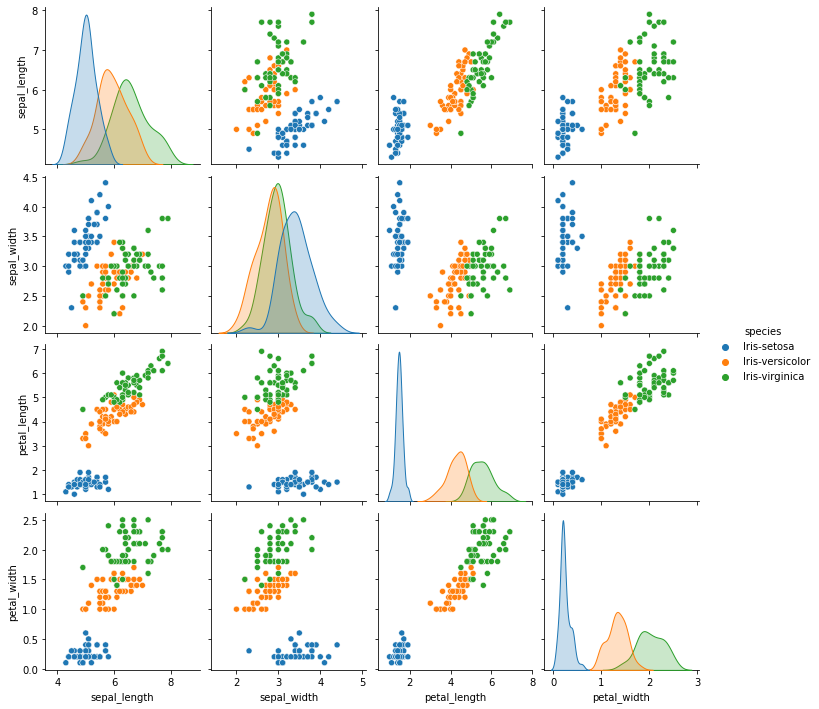

In [5]:
sns.pairplot(data, hue = 'species')
plt.show()

- We can observe that speciesv "Iris Setosa" makes a distinctive cluster in every parameter, while other two species overlap a bit each other.

### Finding the correlation matrix

In [6]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

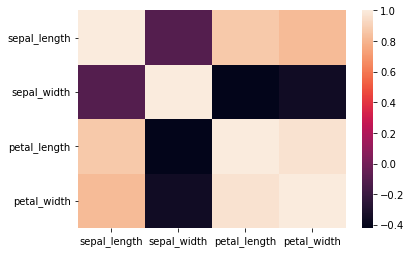

In [7]:
sns.heatmap(data.corr())

- We observed that: (i)Petal length is highly related to petal width (ii)Sepal length is not related to sepal width

### Data Preprocessing

In [9]:
target = data['species']
df = data.copy()
df = df.drop('species', axis = 1)
df.shape

(150, 4)

In [14]:
# defining the attribute and labels
X = data.iloc[:, [0,1,2,3]].values
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
y = data['species'].values
data.shape

(150, 5)

### Trainig the model


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 42)
print("Training Split: ", X_train.shape)
print("Testing Split :", X_test.shape)

Training Split:  (120, 4)
Testing Split : (30, 4)


### Defining Decision Tree Algorithm

In [16]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision Tree Classifier Created")

Decision Tree Classifier Created


### Classification Report and Confusion Matrix

In [17]:
y_pred = dtree.predict(X_test)
print("Classification report: \n", classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
print("Accuracy: ",sm.accuracy_score(y_test, y_pred))

Accuracy:  1.0


- The accuracy is 1 or 100% since i took all the 4 features of the iris dataset.

In [19]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Visualization of trained model

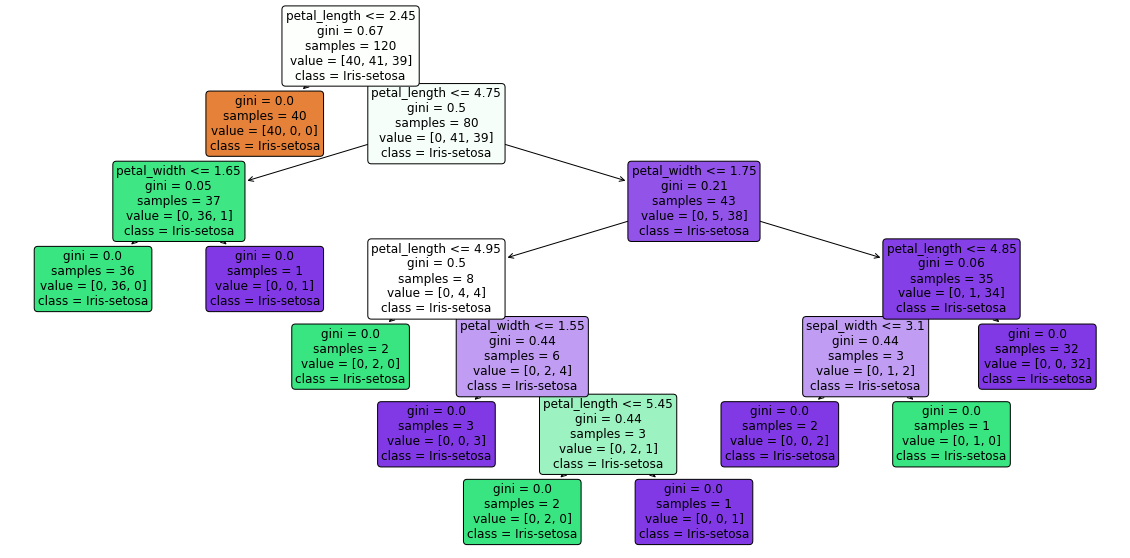

In [20]:
#visualizing the graph
plt.figure(figsize = (20,10))
tree = plot_tree(dtree, feature_names = df.columns, precision = 2,rounded=True,filled=True,class_names=target.values)